In [4]:
from pathlib import Path

import numpy as np
# Basic visualization
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib.collections import PatchCollection
from matplotlib.colors import ListedColormap
import seaborn as sns
# User interaction and online visualization
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import HTML

import physicool.processing as processing

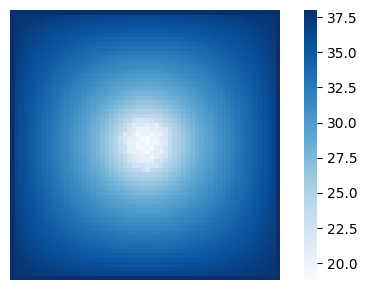

In [35]:
# Select the time point and the z-plane to visualize
time = 110
z_level = 0
cmap = "Blues"
output_path = Path("output/")

# Read data
me = processing.Microenvironment(time, output_path)

# Create a figure
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# Plot the heatmap
sns.heatmap(me.data["oxygen"][z_level],
            ax=ax,
            xticklabels=False, yticklabels=False,
            cmap=cmap,
            square=True)
    
plt.tight_layout()

In [29]:
%matplotlib inline
# Create figure
fig, ax = plt.subplots(1, 1, figsize=(5, 3))

def init():
    """Initial function to plot the first time point data and define the constant elements."""
    me = processing.Microenvironment(0, output_path)
    sns.heatmap(me.data["oxygen"][z_level],
        ax=ax,
        vmin=0, vmax=38,
        xticklabels=False, yticklabels=False,
        cmap=cmap,
        square=True)

def my_func(i):
    """Update function to plot new values into the heatmap."""
    me = processing.Microenvironment(i, output_path)
    sns.heatmap(me.data["oxygen"][z_level],
            ax=ax,
            vmin=0, vmax=38,
            xticklabels=False, yticklabels=False,
            cmap=cmap,
            square=True,
            cbar=False)

# Create the animation using the previous function
anim = animation.FuncAnimation(fig=fig, func=my_func, init_func=init, 
                               frames=115, blit=False, repeat=False)

# Avoid duplicated results
plt.close()
# Visualize the animation
HTML(anim.to_jshtml())

